In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/SD.csv'  # 请确保您的数据文件路径是正确的
df = pd.read_csv(data_path)
df.head()

,成本,价格
0,1.0,39451
1,1.1,40343
2,1.2,46313
3,1.3,47605
4,1.4,37839


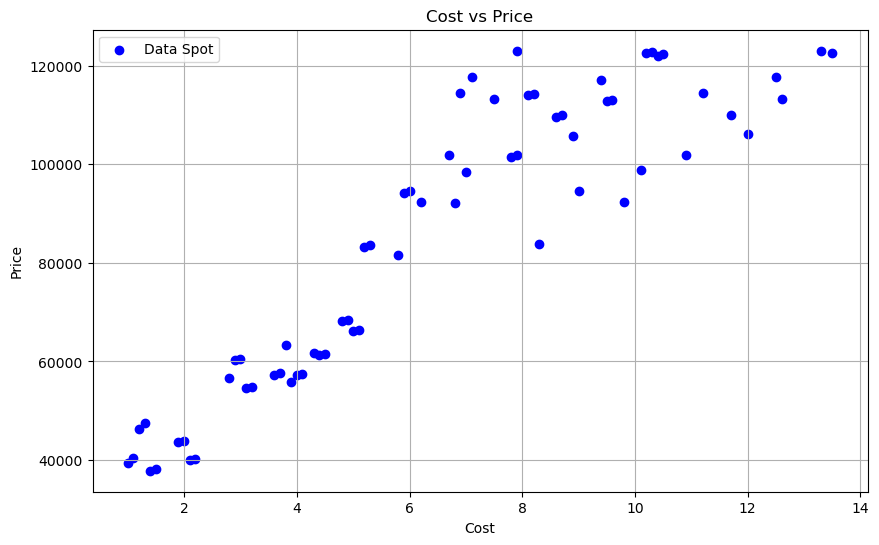

In [10]:
# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['成本'], df['价格'], color='blue', label='Data Spot')
plt.title('Cost vs Price')
plt.xlabel('Cost')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    """
    实现梯度下降算法来优化线性回归模型的参数。
    """
    m = len(y)
    X = np.hstack((np.ones((m, 1)), X))  # 添加一列 1 作为偏置项
    theta = np.zeros(X.shape[1])
    loss_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
        loss = np.mean(errors ** 2) / 2
        loss_history.append(loss)

    return theta, loss_history

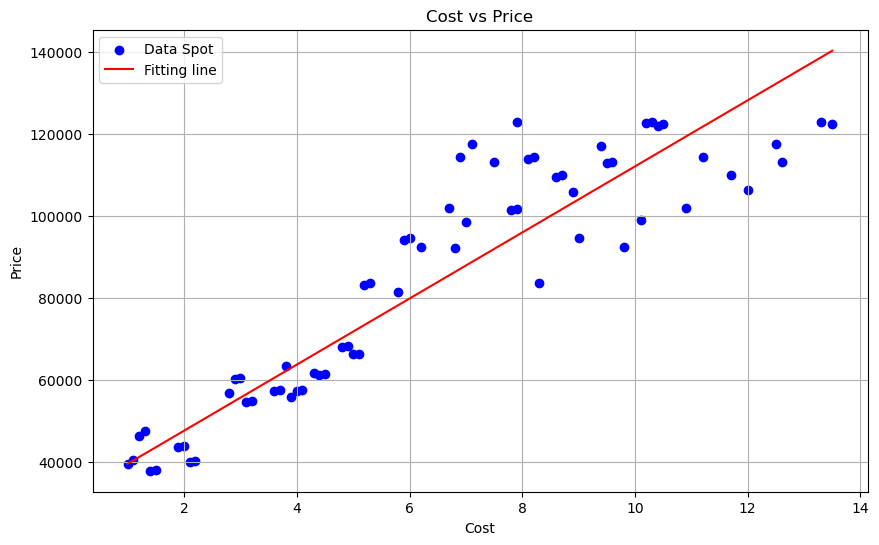

The regression equation is: Price = 31490.83 + 8063.88 * Cost


In [12]:
# 准备数据
X = df[['成本']]
y = df['价格']

# 使用梯度下降优化参数
theta, _ = gradient_descent(X, y, iterations=1000)

# 绘制回归拟合图
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Spot')
plt.plot(X, theta[0] + theta[1] * X, color='red', label='Fitting line')
plt.title('Cost vs Price')
plt.xlabel('Cost')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 显示回归方程
print(f"The regression equation is: Price = {theta[0]:.2f} + {theta[1]:.2f} * Cost")

In [13]:
# 分析迭代次数对性能的影响
iteration_counts = [50, 100, 200, 500, 1000,2000]
losses = []

for iterations in iteration_counts:
    _, loss_history = gradient_descent(X, y, iterations=iterations)
    losses.append(loss_history[-1])

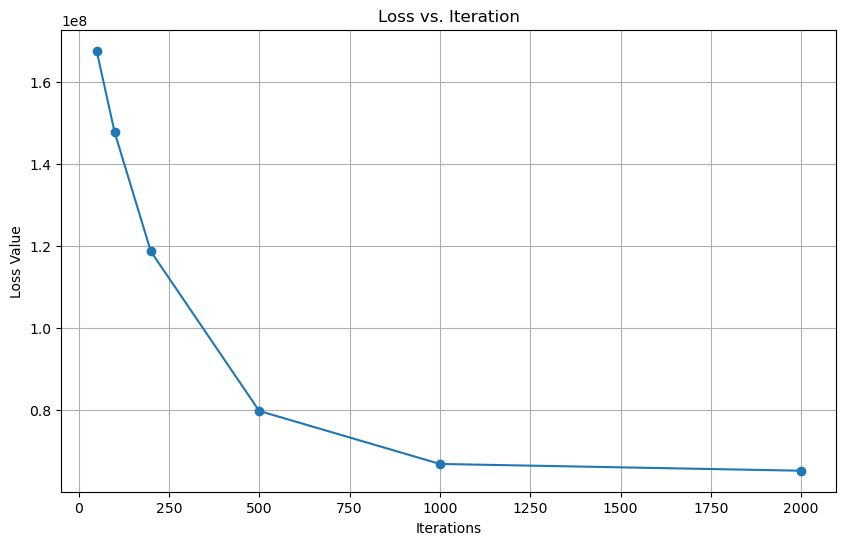

In [14]:
# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, losses, marker='o')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.grid(True)
plt.show()